In [1]:
### Code taken from skl confusion matrix tutorial: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import sys, os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib

from sklearn.metrics import confusion_matrix, classification_report

# if len(argv) != 2:
#     sys.stderr.write("\nUsage: test_classifier.py [pickle file name]\n")
#     sys.exit()
    
# classifierPickleFileName = argv[1]

In [2]:
### Plot the confusion matrix for the best parameters
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=70)
    plt.yticks(tick_marks, classes)
    
    xlabs = plt.gca().get_xticklabels()
    for i in [3, 4, 7, 9]:
        xlabs[i].set_color("blue")
        
    ylabs = plt.gca().get_yticklabels()
    for i in [3, 4, 7, 9]:
        ylabs[i].set_color("blue")
        
    ### add vertical lines separating categories that are similar to each other
    plt.vlines([0.5, 4.5, 6.5, 7.5, 9.5], -0.5, 11.5)
    plt.hlines([0.5, 4.5, 6.5, 7.5, 9.5], -0.5, 11.5)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# plotReportForComparison

This function takes the file name for a pickled classifier and computes and plots the confusion matrix with and without normalization. The pickle should contain the following variables, in order: X_test, y_test, grid_search object

In [3]:
def plotReportForComparison(classifierPickleFileName):
    X_test, y_test, grid_search, class_names = joblib.load(classifierPickleFileName)

    class_names = ["MT=neut_R=neutral","MT=neut_R=smQTNlink", "MT=neut_R=lgQTNlink", "MT=smQTN_R=smQTNlink",
              "MT=lgQTN_R=lgQTNlink", "MT=neut_R=NearSS", "MT=neut_R=FarSS", "MT=sweep_R=NearSS",
               "MT=neut_R=BS", "MT=delet_R=BS", "MT=neut_R=lowRC", "MT=neut_R=invers"]
    
    sys.stderr.write("Testing the best classifier, printing confusion matrix\n")
                 
    y_pred = grid_search.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred, class_names)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(15,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')
    plt.show()
             
    # Plot normalized confusion matrix
    plt.figure(figsize=(15,8))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

    print(classification_report(y_test, y_pred))

# Simple Oversampling
For the data this classifier, I used RandomOverSampler to oversample MT=sweep_R=neutral and MT=delet_R=BS so that
each class would have 500 examples. For the rest of the classes, 1000 random (unique) samples were used.

Stats from 3 best examples in grid search:

Results for extraTreesClassifier

Model with rank: 1

Mean validation score: 0.744 (std: 0.035)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}


Model with rank: 2

Mean validation score: 0.743 (std: 0.022)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}


Model with rank: 3

Mean validation score: 0.742 (std: 0.027)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None}

/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[204  12   0  15   1   6  11]
 [ 15 116   0  13   2  18  89]
 [  0   0  11   0   1   0   0]
 [  8   5   0 231   1   3   4]
 [  2   5   1   2 223   4  15]
 [ 11  28   0   6   1  13  29]
 [  9  87   1  11   6  14 126]]


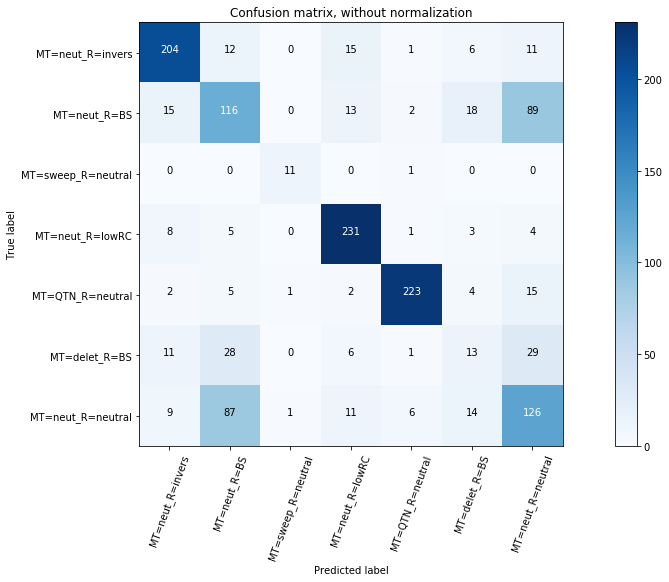

Normalized confusion matrix
[[0.82 0.05 0.   0.06 0.   0.02 0.04]
 [0.06 0.46 0.   0.05 0.01 0.07 0.35]
 [0.   0.   0.92 0.   0.08 0.   0.  ]
 [0.03 0.02 0.   0.92 0.   0.01 0.02]
 [0.01 0.02 0.   0.01 0.88 0.02 0.06]
 [0.12 0.32 0.   0.07 0.01 0.15 0.33]
 [0.04 0.34 0.   0.04 0.02 0.06 0.5 ]]


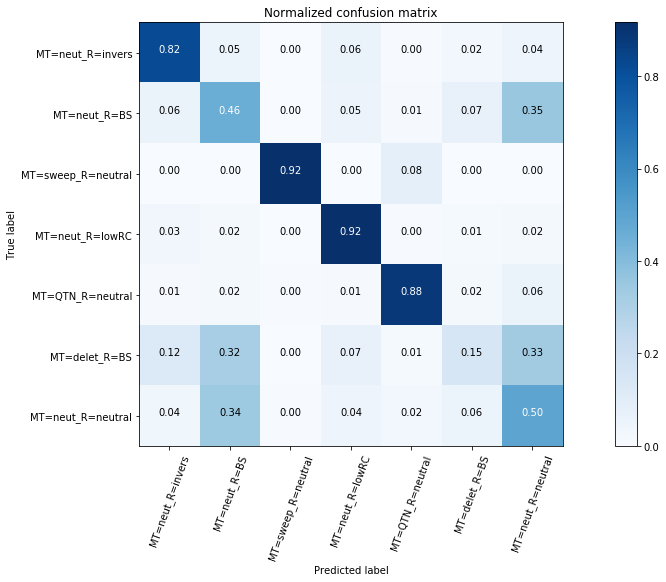

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.95      0.88      0.92       252
     MT=delet_R=BS       0.22      0.15      0.18        88
      MT=neut_R=BS       0.46      0.46      0.46       253
  MT=neut_R=invers       0.82      0.82      0.82       249
   MT=neut_R=lowRC       0.83      0.92      0.87       252
 MT=neut_R=neutral       0.46      0.50      0.48       254
MT=sweep_R=neutral       0.85      0.92      0.88        12

       avg / total       0.67      0.68      0.67      1360



In [6]:
plotReportForComparison("ScaleAcrossGenomeUnderAndOverSample.p")

# Synthetic Samples with SMOTE

For the data for this classifier, I used the SMOTE algorithm to generate synthetic data points for each class that has less examples than the class with the most examples. This was after randomly selecting only 1000 examples from the classes that had over 1000 examples.

Stats from the grid search: 

Results for extraTreesClassifier

Model with rank: 1

Mean validation score: 0.751 (std: 0.019)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'entropy', 'max_features': 3, 'max_depth': None}


Model with rank: 2

Mean validation score: 0.748 (std: 0.015)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}


Model with rank: 3

Mean validation score: 0.747 (std: 0.020)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 9, 'max_depth': None}"


Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[189  17   0  10   2  21  10]
 [  7 107   0  15   3  53  68]
 [  0   0  11   0   1   0   0]
 [  3   2   0 243   0   3   1]
 [  1   9   1   2 215   6  18]
 [  6  31   0   7   1  23  20]
 [  9  87   1   8   6  31 112]]


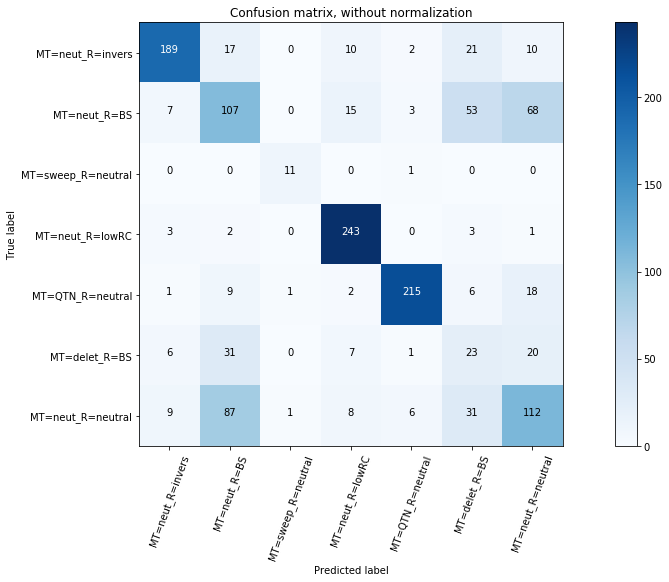

Normalized confusion matrix
[[0.76 0.07 0.   0.04 0.01 0.08 0.04]
 [0.03 0.42 0.   0.06 0.01 0.21 0.27]
 [0.   0.   0.92 0.   0.08 0.   0.  ]
 [0.01 0.01 0.   0.96 0.   0.01 0.  ]
 [0.   0.04 0.   0.01 0.85 0.02 0.07]
 [0.07 0.35 0.   0.08 0.01 0.26 0.23]
 [0.04 0.34 0.   0.03 0.02 0.12 0.44]]


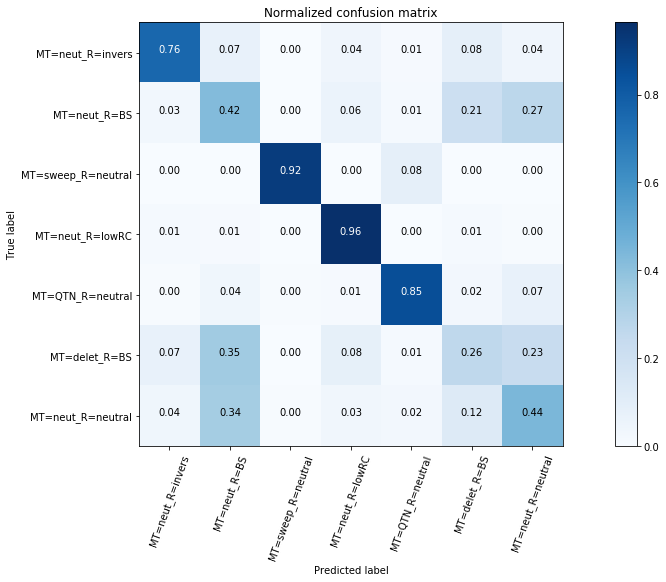

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.94      0.85      0.90       252
     MT=delet_R=BS       0.17      0.26      0.20        88
      MT=neut_R=BS       0.42      0.42      0.42       253
  MT=neut_R=invers       0.88      0.76      0.81       249
   MT=neut_R=lowRC       0.85      0.96      0.91       252
 MT=neut_R=neutral       0.49      0.44      0.46       254
MT=sweep_R=neutral       0.85      0.92      0.88        12

       avg / total       0.68      0.66      0.67      1360



In [13]:
plotReportForComparison("clfAcrossGenomeSMOTE1000.p")

# No oversampling

For this classifier, I 1000 ranndom members of each class to use as the training/testing data. For the classes that had less than 1000 members, I used the entire class but did not oversample or augment the data in any way

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[185  24   0  20   0   8  12]
 [  6 127   0  14   2   8  96]
 [  0   0   9   1   2   0   0]
 [ 12   4   1 233   0   0   2]
 [  0  16   0   0 215   3  18]
 [  9  36   0   9   1   1  32]
 [  6  95   0   9   2   4 138]]


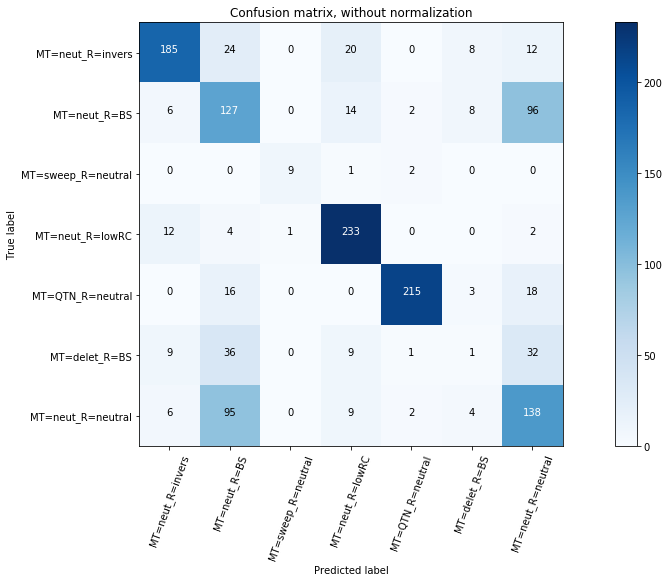

Normalized confusion matrix
[[0.74 0.1  0.   0.08 0.   0.03 0.05]
 [0.02 0.5  0.   0.06 0.01 0.03 0.38]
 [0.   0.   0.75 0.08 0.17 0.   0.  ]
 [0.05 0.02 0.   0.92 0.   0.   0.01]
 [0.   0.06 0.   0.   0.85 0.01 0.07]
 [0.1  0.41 0.   0.1  0.01 0.01 0.36]
 [0.02 0.37 0.   0.04 0.01 0.02 0.54]]


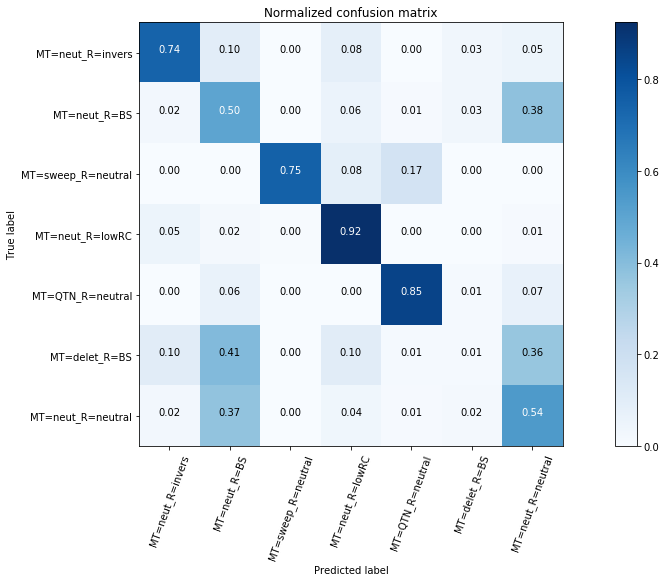

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.97      0.85      0.91       252
     MT=delet_R=BS       0.04      0.01      0.02        88
      MT=neut_R=BS       0.42      0.50      0.46       253
  MT=neut_R=invers       0.85      0.74      0.79       249
   MT=neut_R=lowRC       0.81      0.92      0.87       252
 MT=neut_R=neutral       0.46      0.54      0.50       254
MT=sweep_R=neutral       0.90      0.75      0.82        12

       avg / total       0.66      0.67      0.66      1360



In [7]:
plotReportForComparison("clfAcrossGenomeNoScale1000.p")

# New Background Selection Criteria

For the following classifiers, I modified the input data by tightening the criteria for the background selection region. Instead of the entire 10000bp region in the center of the BGS chromosomes counting as alleles under the effects of background selection, I only labeled the SNPs within 500bp of a deleterious mutation as under the effects of background selection.

## New BGS, no oversampling

As in the last classifier, 1000 random examples were chosen from each class with no oversampling. However, this classfier used the feature vectors conforming to the new BGS criteria.

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[183  30   0  19   2   6   9]
 [  7 146   0  11   2   5  82]
 [  0   0   8   0   4   0   0]
 [  8   2   0 239   2   0   1]
 [  0   8   0   2 223   0  19]
 [  5  54   0   6   0   8  15]
 [  8 108   1   8   5  11 113]]


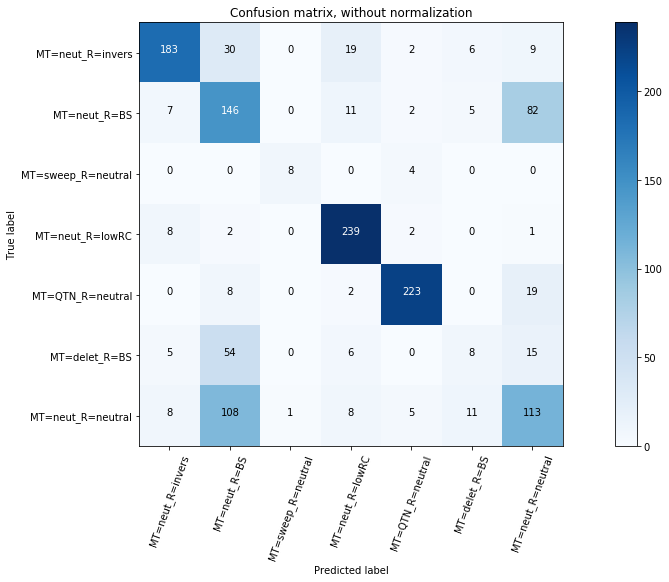

Normalized confusion matrix
[[0.73 0.12 0.   0.08 0.01 0.02 0.04]
 [0.03 0.58 0.   0.04 0.01 0.02 0.32]
 [0.   0.   0.67 0.   0.33 0.   0.  ]
 [0.03 0.01 0.   0.95 0.01 0.   0.  ]
 [0.   0.03 0.   0.01 0.88 0.   0.08]
 [0.06 0.61 0.   0.07 0.   0.09 0.17]
 [0.03 0.43 0.   0.03 0.02 0.04 0.44]]


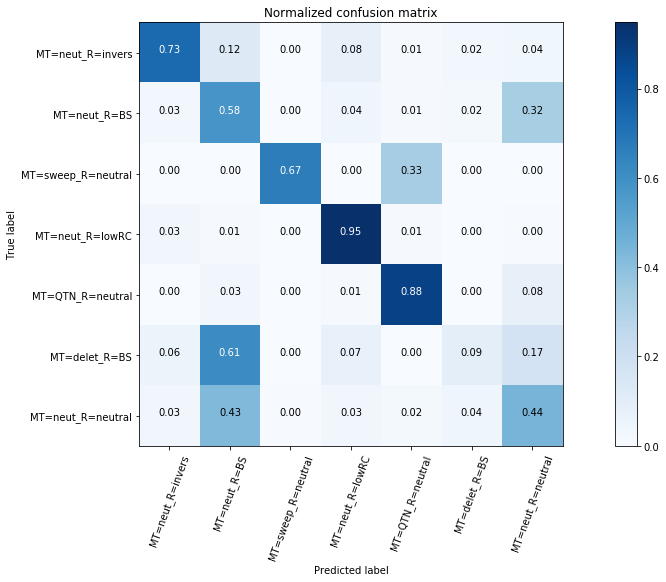

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.94      0.88      0.91       252
     MT=delet_R=BS       0.27      0.09      0.14        88
      MT=neut_R=BS       0.42      0.58      0.49       253
  MT=neut_R=invers       0.87      0.73      0.80       249
   MT=neut_R=lowRC       0.84      0.95      0.89       252
 MT=neut_R=neutral       0.47      0.44      0.46       254
MT=sweep_R=neutral       0.89      0.67      0.76        12

       avg / total       0.68      0.68      0.67      1360



In [8]:
plotReportForComparison("clfxGenomeNoScale500bs.p")

# New BGS, SMOTE
This classifier uses the new BGS labels and oversamples using SMOTE so that each class has 1000 examples

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[181  12   0  21   0  23  12]
 [ 11 110   0  12   2  45  73]
 [  0   0  10   0   2   0   0]
 [ 14   2   0 229   0   4   3]
 [  3   1   1   0 226   7  14]
 [  2  26   0   7   2  31  20]
 [  8  80   0  11   9  42 104]]


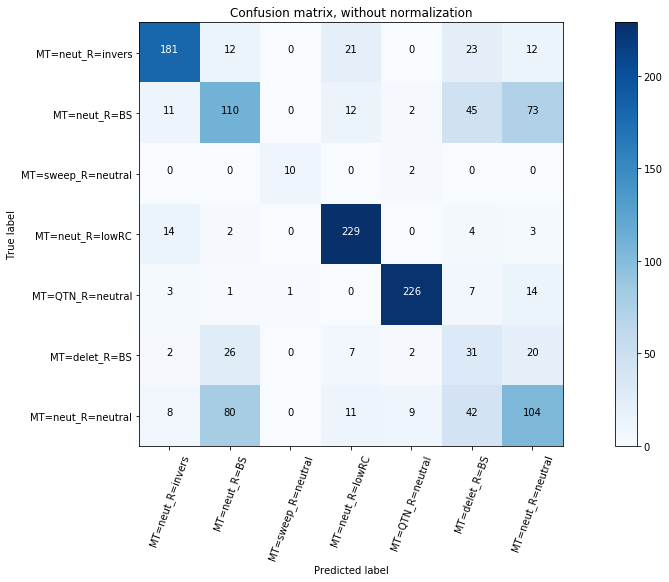

Normalized confusion matrix
[[0.73 0.05 0.   0.08 0.   0.09 0.05]
 [0.04 0.43 0.   0.05 0.01 0.18 0.29]
 [0.   0.   0.83 0.   0.17 0.   0.  ]
 [0.06 0.01 0.   0.91 0.   0.02 0.01]
 [0.01 0.   0.   0.   0.9  0.03 0.06]
 [0.02 0.3  0.   0.08 0.02 0.35 0.23]
 [0.03 0.31 0.   0.04 0.04 0.17 0.41]]


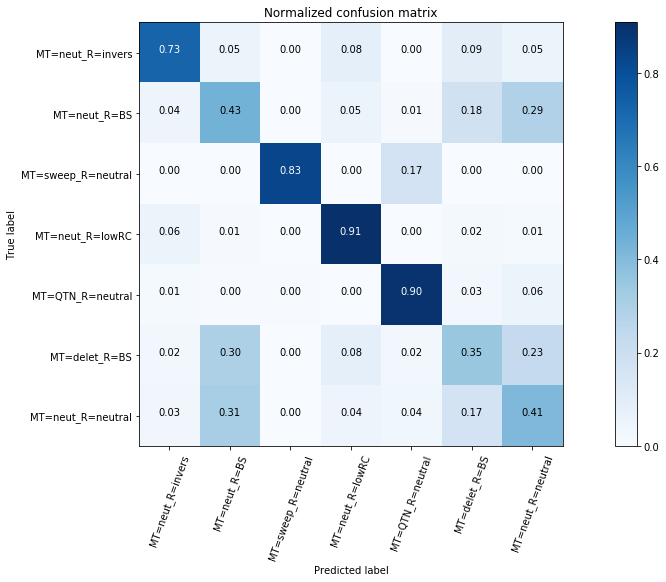

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.94      0.90      0.92       252
     MT=delet_R=BS       0.20      0.35      0.26        88
      MT=neut_R=BS       0.48      0.43      0.45       253
  MT=neut_R=invers       0.83      0.73      0.77       249
   MT=neut_R=lowRC       0.82      0.91      0.86       252
 MT=neut_R=neutral       0.46      0.41      0.43       254
MT=sweep_R=neutral       0.91      0.83      0.87        12

       avg / total       0.67      0.66      0.66      1360



In [10]:
plotReportForComparison("clfxGenomeSMOTE500bs.p")

# Same label for delet_mut and neut_bgs

Another attempt at rewriting the dataset to improve classification for the BGS regions. In this set there is no class for MT=delet_R=BS, it is just included with MT=neut_R=BS. This is based on the idea that an SNP under purifying selection will be indistinguishible from an SNP that is in close LD with an SNP under purifying selection

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[183  27   0  15   4   0  12]
 [ 11 137   0   9   7   0  89]
 [  0   0  11   0   1   0   0]
 [ 11   3   0 231   0   0   0]
 [  3  11   8   2 207   0  12]
 [  0   0   0   0   0   0   0]
 [ 11 100   0  10  11   0 139]]


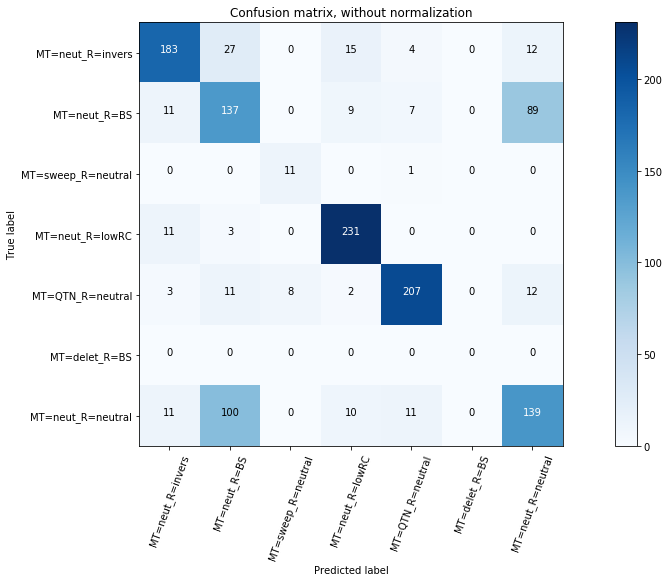

/home/kevin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


Normalized confusion matrix
[[0.76 0.11 0.   0.06 0.02 0.   0.05]
 [0.04 0.54 0.   0.04 0.03 0.   0.35]
 [0.   0.   0.92 0.   0.08 0.   0.  ]
 [0.04 0.01 0.   0.94 0.   0.   0.  ]
 [0.01 0.05 0.03 0.01 0.85 0.   0.05]
 [ nan  nan  nan  nan  nan  nan  nan]
 [0.04 0.37 0.   0.04 0.04 0.   0.51]]


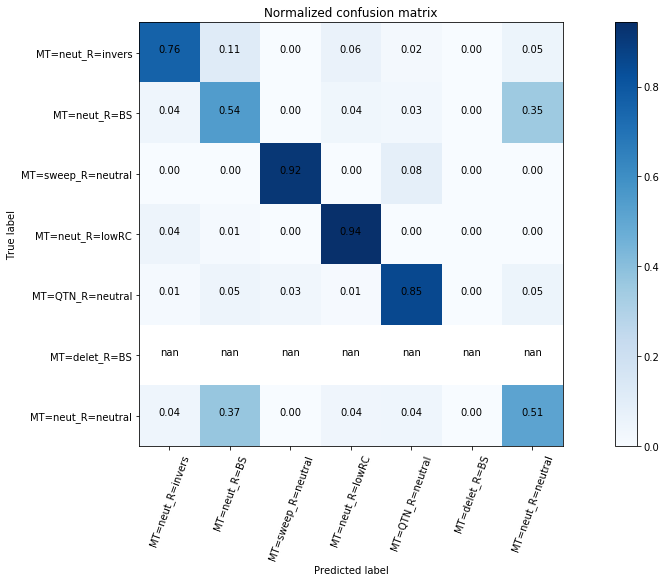

                    precision    recall  f1-score   support

  MT=QTN_R=neutral       0.90      0.85      0.88       243
      MT=neut_R=BS       0.49      0.54      0.52       253
  MT=neut_R=invers       0.84      0.76      0.80       241
   MT=neut_R=lowRC       0.87      0.94      0.90       245
 MT=neut_R=neutral       0.55      0.51      0.53       271
MT=sweep_R=neutral       0.58      0.92      0.71        12

       avg / total       0.72      0.72      0.72      1265



In [11]:
plotReportForComparison("clfxGenomeSMOTENoDeletMut.p")

# Update Stats and labels

This classifier added a few new stats and labels. The new stats are:


1) RDAvegan_v2.5.2_ALL_loading_RDA1_envi 

2) LEA_1.2.0_ALL_K3_log10p

3) LEA_1.2.0_ALL_K3_z 

4) baypass_2.1_PRUNED_BF_env

5) baypass_2.1_PRUNED_XTX

6) OutFLANK_0.2_PRUNED_log10p


The new labels, corresponding to regions, are:


1) FarSS -- the loci is 1000 - 2000 bp away from a selective sweep

2) NearSS -- the loci is 1000bp or less away from a selective sweep

3) smQTNlink -- the loci is 200bp or less away from a QTN of small effect (<.20 prop)

4) lgQTNlink -- the loci is 200bp or less away from a QTN of large effect (>=.20 prop)

/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[182   9   0  14   2  30   7   3   0   3   1]
 [  6  82   0  12   4  39  69   2   0  21   8]
 [  0   0   3   0   0   0   0   0   7   0   0]
 [ 10   1   1 206   0   1   1  14  14   2   0]
 [  1  13   0   1  85   6   8   1   0  26  44]
 [  4  13   0   9   2  32  15   0   0  11   5]
 [  5  62   0  11   9  39  71   4   1  36  15]
 [  0   7   1  21   0   4   2  61  64   0   0]
 [  0   2  15  18   0   0   1  46 158   0   0]
 [  3  53   0   3  33  30  66   1   1  47  28]
 [  0  10   0   0  30   9   8   0   0  11  37]]


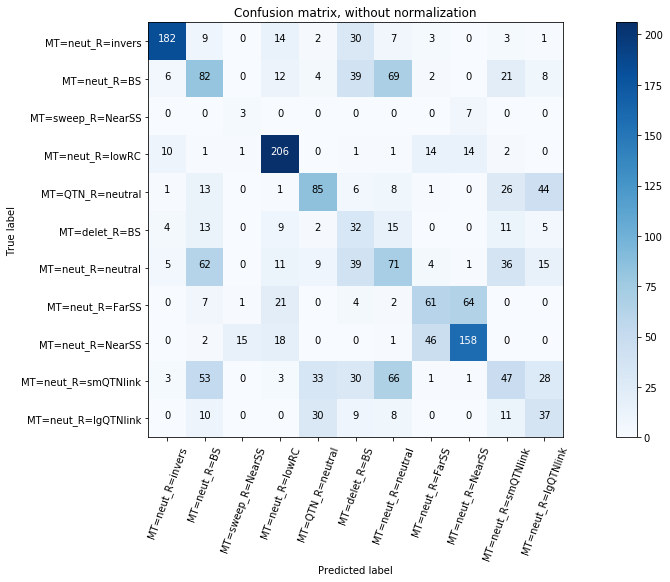

Normalized confusion matrix
[[0.73 0.04 0.   0.06 0.01 0.12 0.03 0.01 0.   0.01 0.  ]
 [0.02 0.34 0.   0.05 0.02 0.16 0.28 0.01 0.   0.09 0.03]
 [0.   0.   0.3  0.   0.   0.   0.   0.   0.7  0.   0.  ]
 [0.04 0.   0.   0.82 0.   0.   0.   0.06 0.06 0.01 0.  ]
 [0.01 0.07 0.   0.01 0.46 0.03 0.04 0.01 0.   0.14 0.24]
 [0.04 0.14 0.   0.1  0.02 0.35 0.16 0.   0.   0.12 0.05]
 [0.02 0.25 0.   0.04 0.04 0.15 0.28 0.02 0.   0.14 0.06]
 [0.   0.04 0.01 0.13 0.   0.03 0.01 0.38 0.4  0.   0.  ]
 [0.   0.01 0.06 0.07 0.   0.   0.   0.19 0.66 0.   0.  ]
 [0.01 0.2  0.   0.01 0.12 0.11 0.25 0.   0.   0.18 0.11]
 [0.   0.1  0.   0.   0.29 0.09 0.08 0.   0.   0.1  0.35]]


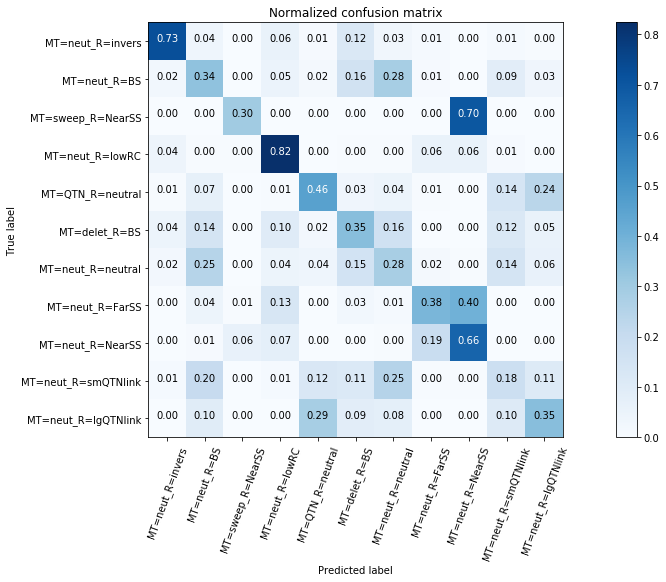

                     precision    recall  f1-score   support

   MT=QTN_R=neutral       0.52      0.46      0.49       185
      MT=delet_R=BS       0.17      0.35      0.23        91
       MT=neut_R=BS       0.33      0.34      0.33       243
    MT=neut_R=FarSS       0.46      0.38      0.42       160
   MT=neut_R=NearSS       0.64      0.66      0.65       240
   MT=neut_R=invers       0.86      0.73      0.79       251
MT=neut_R=lgQTNlink       0.27      0.35      0.30       105
    MT=neut_R=lowRC       0.70      0.82      0.76       250
  MT=neut_R=neutral       0.29      0.28      0.28       253
MT=neut_R=smQTNlink       0.30      0.18      0.22       265
  MT=sweep_R=NearSS       0.15      0.30      0.20        10

        avg / total       0.48      0.47      0.47      2053



In [4]:
plotReportForComparison("extraStatsNewLabels.p")

# Add labels

This classifier used the same updated stats and labels as before, but it adds a distinction between QTNs of large effect and QTNs of small effect in the labeling

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[ 69  54   8   4   0   0   6   0  71  37  11   4]
 [ 44  74  17  31   1   0   1   0  41  28   0   3]
 [  9  21  46  31   8   0   0   0   9   8   1   0]
 [ 15  25  23  68   6   0   0   0  11   9   3   1]
 [  0   0   6   5   8   0   0   0   0   0   0   0]
 [  0   1   1   0   0 143  68  17   1   1  21   0]
 [  4   0   0   0   0  59  47   2   5   3  25   0]
 [  0   0   0   0   0   8   1   5   0   0   0   0]
 [ 72  23   7   3   0   1   5   0  78  34  10   3]
 [ 22   9   6   5   0   0   0   0  28  25   6   8]
 [  0   0   0   1   0  15  16   0   1   4 190   6]
 [  5   2   2   1   0   0   0   0  14  15  19 192]]


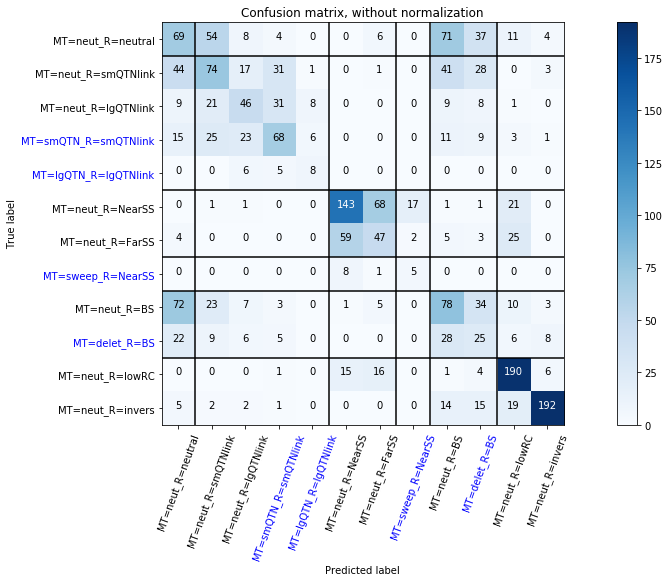

Normalized confusion matrix
[[0.26 0.2  0.03 0.02 0.   0.   0.02 0.   0.27 0.14 0.04 0.02]
 [0.18 0.31 0.07 0.13 0.   0.   0.   0.   0.17 0.12 0.   0.01]
 [0.07 0.16 0.35 0.23 0.06 0.   0.   0.   0.07 0.06 0.01 0.  ]
 [0.09 0.16 0.14 0.42 0.04 0.   0.   0.   0.07 0.06 0.02 0.01]
 [0.   0.   0.32 0.26 0.42 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.57 0.27 0.07 0.   0.   0.08 0.  ]
 [0.03 0.   0.   0.   0.   0.41 0.32 0.01 0.03 0.02 0.17 0.  ]
 [0.   0.   0.   0.   0.   0.57 0.07 0.36 0.   0.   0.   0.  ]
 [0.31 0.1  0.03 0.01 0.   0.   0.02 0.   0.33 0.14 0.04 0.01]
 [0.2  0.08 0.06 0.05 0.   0.   0.   0.   0.26 0.23 0.06 0.07]
 [0.   0.   0.   0.   0.   0.06 0.07 0.   0.   0.02 0.82 0.03]
 [0.02 0.01 0.01 0.   0.   0.   0.   0.   0.06 0.06 0.08 0.77]]


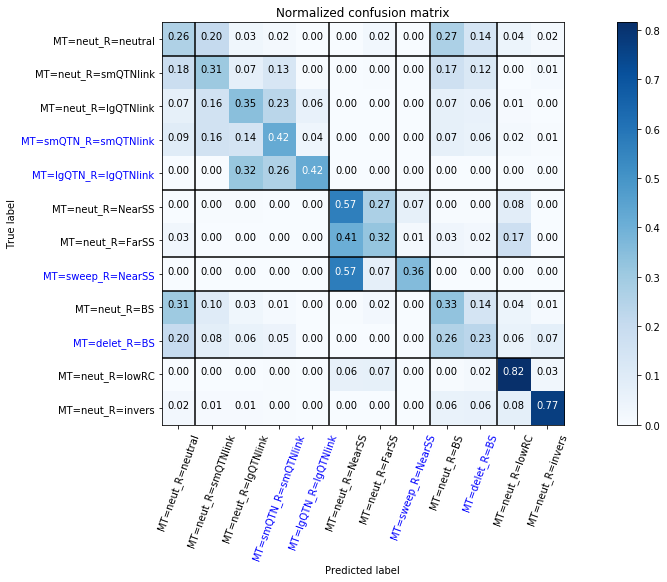

                      precision    recall  f1-score   support

       MT=delet_R=BS       0.15      0.23      0.18       109
MT=lgQTN_R=lgQTNlink       0.35      0.42      0.38        19
        MT=neut_R=BS       0.30      0.33      0.32       236
     MT=neut_R=FarSS       0.33      0.32      0.33       145
    MT=neut_R=NearSS       0.63      0.57      0.60       253
    MT=neut_R=invers       0.88      0.77      0.82       250
 MT=neut_R=lgQTNlink       0.40      0.35      0.37       133
     MT=neut_R=lowRC       0.66      0.82      0.73       233
   MT=neut_R=neutral       0.29      0.26      0.27       264
 MT=neut_R=smQTNlink       0.35      0.31      0.33       240
MT=smQTN_R=smQTNlink       0.46      0.42      0.44       161
   MT=sweep_R=NearSS       0.21      0.36      0.26        14

         avg / total       0.47      0.46      0.46      2057



In [28]:
plotReportForComparison("QTNdistinct.p")

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[ 69  54   8   0   6  71  11   4   4   0   0  37]
 [ 44  74  17   0   1  41   0   3  31   1   0  28]
 [  9  21  46   0   0   9   1   0  31   8   0   8]
 [  0   1   1 143  68   1  21   0   0   0  17   1]
 [  4   0   0  59  47   5  25   0   0   0   2   3]
 [ 72  23   7   1   5  78  10   3   3   0   0  34]
 [  0   0   0  15  16   1 190   6   1   0   0   4]
 [  5   2   2   0   0  14  19 192   1   0   0  15]
 [ 15  25  23   0   0  11   3   1  68   6   0   9]
 [  0   0   6   0   0   0   0   0   5   8   0   0]
 [  0   0   0   8   1   0   0   0   0   0   5   0]
 [ 22   9   6   0   0  28   6   8   5   0   0  25]]


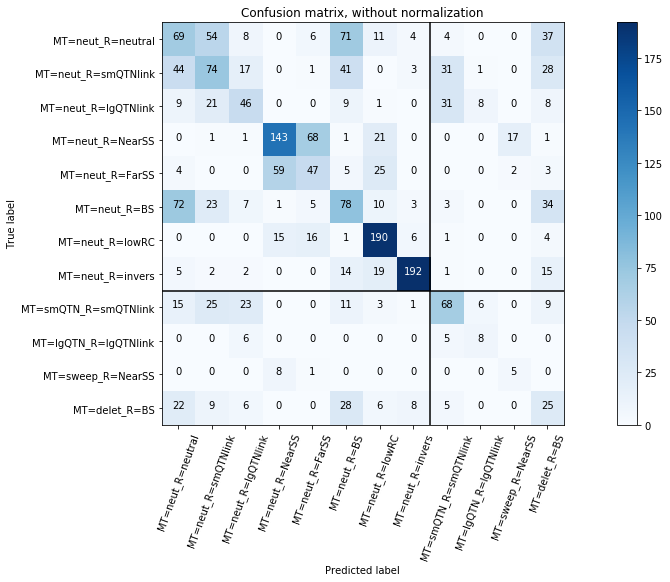

Normalized confusion matrix
[[0.26 0.2  0.03 0.   0.02 0.27 0.04 0.02 0.02 0.   0.   0.14]
 [0.18 0.31 0.07 0.   0.   0.17 0.   0.01 0.13 0.   0.   0.12]
 [0.07 0.16 0.35 0.   0.   0.07 0.01 0.   0.23 0.06 0.   0.06]
 [0.   0.   0.   0.57 0.27 0.   0.08 0.   0.   0.   0.07 0.  ]
 [0.03 0.   0.   0.41 0.32 0.03 0.17 0.   0.   0.   0.01 0.02]
 [0.31 0.1  0.03 0.   0.02 0.33 0.04 0.01 0.01 0.   0.   0.14]
 [0.   0.   0.   0.06 0.07 0.   0.82 0.03 0.   0.   0.   0.02]
 [0.02 0.01 0.01 0.   0.   0.06 0.08 0.77 0.   0.   0.   0.06]
 [0.09 0.16 0.14 0.   0.   0.07 0.02 0.01 0.42 0.04 0.   0.06]
 [0.   0.   0.32 0.   0.   0.   0.   0.   0.26 0.42 0.   0.  ]
 [0.   0.   0.   0.57 0.07 0.   0.   0.   0.   0.   0.36 0.  ]
 [0.2  0.08 0.06 0.   0.   0.26 0.06 0.07 0.05 0.   0.   0.23]]


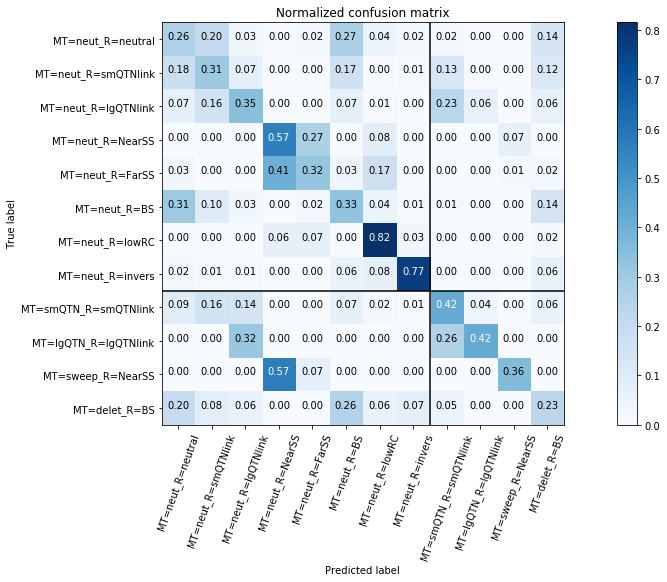

                      precision    recall  f1-score   support

       MT=delet_R=BS       0.15      0.23      0.18       109
MT=lgQTN_R=lgQTNlink       0.35      0.42      0.38        19
        MT=neut_R=BS       0.30      0.33      0.32       236
     MT=neut_R=FarSS       0.33      0.32      0.33       145
    MT=neut_R=NearSS       0.63      0.57      0.60       253
    MT=neut_R=invers       0.88      0.77      0.82       250
 MT=neut_R=lgQTNlink       0.40      0.35      0.37       133
     MT=neut_R=lowRC       0.66      0.82      0.73       233
   MT=neut_R=neutral       0.29      0.26      0.27       264
 MT=neut_R=smQTNlink       0.35      0.31      0.33       240
MT=smQTN_R=smQTNlink       0.46      0.42      0.44       161
   MT=sweep_R=NearSS       0.21      0.36      0.26        14

         avg / total       0.47      0.46      0.46      2057



In [30]:
plotReportForComparison("QTNdistinct.p")

In [10]:
X_test, y_test, grid_search, class_names = joblib.load("QTNdistinct.p")
print(class_names)

# linked regions together
class_names = ["MT=neut_R=neutral","MT=neut_R=smQTNlink", "MT=neut_R=lgQTNlink", "MT=smQTN_R=smQTNlink",
              "MT=lgQTN_R=lgQTNlink", "MT=neut_R=NearSS", "MT=neut_R=FarSS", "MT=sweep_R=NearSS",
               "MT=neut_R=BS", "MT=delet_R=BS", "MT=neut_R=lowRC", "MT=neut_R=invers"]
## all neutrals together
class_names = ["MT=neut_R=neutral","MT=neut_R=smQTNlink", "MT=neut_R=lgQTNlink",
              "MT=neut_R=NearSS", "MT=neut_R=FarSS", "MT=neut_R=BS", "MT=neut_R=lowRC", 
               "MT=neut_R=invers", "MT=smQTN_R=smQTNlink", "MT=lgQTN_R=lgQTNlink", 
               "MT=sweep_R=NearSS", "MT=delet_R=BS"]

SyntaxError: invalid syntax (<ipython-input-10-4b01b477ec0c>, line 4)

# Add some more summary stats - pi, watterson's theta, tajima's D

Results for extraTreesClassifier




Model with rank: 1

Mean validation score: 0.714 (std: 0.036)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'gini', 

'max_features': 4, 'max_depth': None}




Model with rank: 2

Mean validation score: 0.713 (std: 0.037)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini',

'max_features': 4, 'max_depth': None}




Model with rank: 3

Mean validation score: 0.712 (std: 0.036)

Parameters: {'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 3, 'criterion': 'gini', 

'max_features': 18, 'max_depth': None}


/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[ 77  38   4   9   0   1   4   0  82  40   6   3]
 [ 41  60  16  34   1   3   0   0  41  39   1   4]
 [ 11  20  45  27   8   0   0   0  12   9   0   1]
 [ 15  28  22  71   3   1   2   0  11   7   1   0]
 [  0   0   4   1  14   0   0   0   0   0   0   0]
 [  3   0   0   0   0 172  55  10   0   1  12   0]
 [  4   0   0   0   0  54  69   1   2   3  11   1]
 [  0   0   0   0   0  10   2   2   0   0   0   0]
 [ 58  31   1   6   0   5   3   0  93  34   4   1]
 [ 22   3   6   3   0   0   0   0  28  42   2   3]
 [  0   0   0   1   0  12  13   0   0   2 194  11]
 [  2   0   0   0   0   0   0   0   1   2   9 236]]


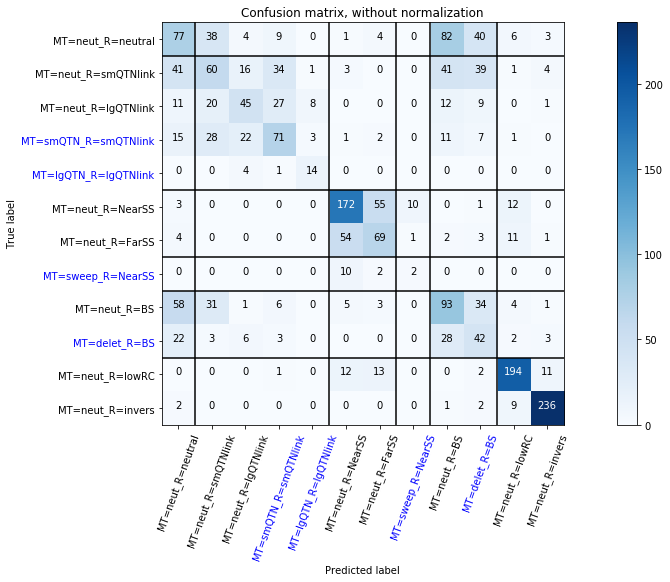

Normalized confusion matrix
[[0.29 0.14 0.02 0.03 0.   0.   0.02 0.   0.31 0.15 0.02 0.01]
 [0.17 0.25 0.07 0.14 0.   0.01 0.   0.   0.17 0.16 0.   0.02]
 [0.08 0.15 0.34 0.2  0.06 0.   0.   0.   0.09 0.07 0.   0.01]
 [0.09 0.17 0.14 0.44 0.02 0.01 0.01 0.   0.07 0.04 0.01 0.  ]
 [0.   0.   0.21 0.05 0.74 0.   0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.   0.68 0.22 0.04 0.   0.   0.05 0.  ]
 [0.03 0.   0.   0.   0.   0.37 0.48 0.01 0.01 0.02 0.08 0.01]
 [0.   0.   0.   0.   0.   0.71 0.14 0.14 0.   0.   0.   0.  ]
 [0.25 0.13 0.   0.03 0.   0.02 0.01 0.   0.39 0.14 0.02 0.  ]
 [0.2  0.03 0.06 0.03 0.   0.   0.   0.   0.26 0.39 0.02 0.03]
 [0.   0.   0.   0.   0.   0.05 0.06 0.   0.   0.01 0.83 0.05]
 [0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.04 0.94]]


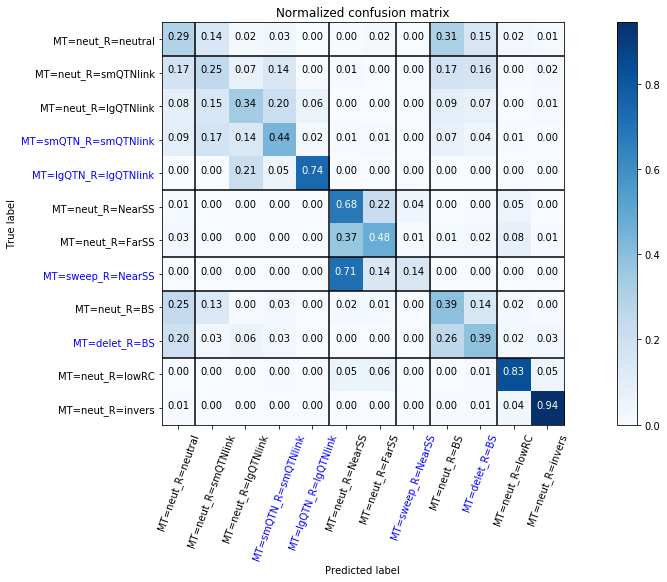

                      precision    recall  f1-score   support

       MT=delet_R=BS       0.23      0.39      0.29       109
MT=lgQTN_R=lgQTNlink       0.54      0.74      0.62        19
        MT=neut_R=BS       0.34      0.39      0.37       236
     MT=neut_R=FarSS       0.47      0.48      0.47       145
    MT=neut_R=NearSS       0.67      0.68      0.67       253
    MT=neut_R=invers       0.91      0.94      0.93       250
 MT=neut_R=lgQTNlink       0.46      0.34      0.39       133
     MT=neut_R=lowRC       0.81      0.83      0.82       233
   MT=neut_R=neutral       0.33      0.29      0.31       264
 MT=neut_R=smQTNlink       0.33      0.25      0.29       240
MT=smQTN_R=smQTNlink       0.47      0.44      0.45       161
   MT=sweep_R=NearSS       0.15      0.14      0.15        14

         avg / total       0.52      0.52      0.52      2057



In [4]:
plotReportForComparison("addPiThetaD.p")

# Using all data instead of undersampling majority classes

Uses all the stats up to this point but does not do any under/oversampling from the data. Much larger dataset and classifier, took about 10 hours to run the grid search. Logged in classifySNPs10-30.log

/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/kevin/anaconda3/envs/ML/lib/python2.7/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator ExtraTreeClassifier from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use

Confusion matrix, without normalization
[[77612     9     7     5     0    48     5     1     3     1   254    84]
 [  831    26     2     7     0     0     0     0     0     0     1     1]
 [   98     2    21     2     8     0     0     0     0     0     0     0]
 [  131    16     5     4     1     0     0     0     0     0     1     0]
 [    0     1     7     0    11     0     0     0     0     0     0     0]
 [   85     0     0     0     0   146     3     4     0     0    15     0]
 [  104     0     0     0     0    29    11     0     0     0    23     0]
 [    1     0     0     0     0    11     0     2     0     0     0     0]
 [ 7682     0     0     0     0     0     0     0   157     1     6     1]
 [  102     0     0     0     0     0     0     0     0     0     0     0]
 [  295     0     0     0     0     8     2     0     0     0  1812    63]
 [  184     0     0     0     0     0     0     0     0     0    61  2764]]


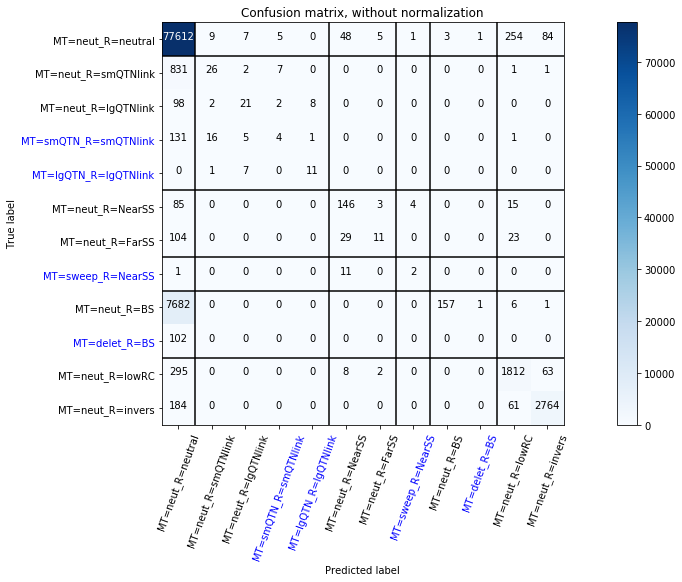

Normalized confusion matrix
[[9.95e-01 1.15e-04 8.97e-05 6.41e-05 0.00e+00 6.15e-04 6.41e-05 1.28e-05
  3.84e-05 1.28e-05 3.26e-03 1.08e-03]
 [9.57e-01 3.00e-02 2.30e-03 8.06e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 1.15e-03 1.15e-03]
 [7.48e-01 1.53e-02 1.60e-01 1.53e-02 6.11e-02 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [8.29e-01 1.01e-01 3.16e-02 2.53e-02 6.33e-03 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 6.33e-03 0.00e+00]
 [0.00e+00 5.26e-02 3.68e-01 0.00e+00 5.79e-01 0.00e+00 0.00e+00 0.00e+00
  0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [3.36e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 5.77e-01 1.19e-02 1.58e-02
  0.00e+00 0.00e+00 5.93e-02 0.00e+00]
 [6.23e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.74e-01 6.59e-02 0.00e+00
  0.00e+00 0.00e+00 1.38e-01 0.00e+00]
 [7.14e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 7.86e-01 0.00e+00 1.43e-01
  0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [9.79e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.0

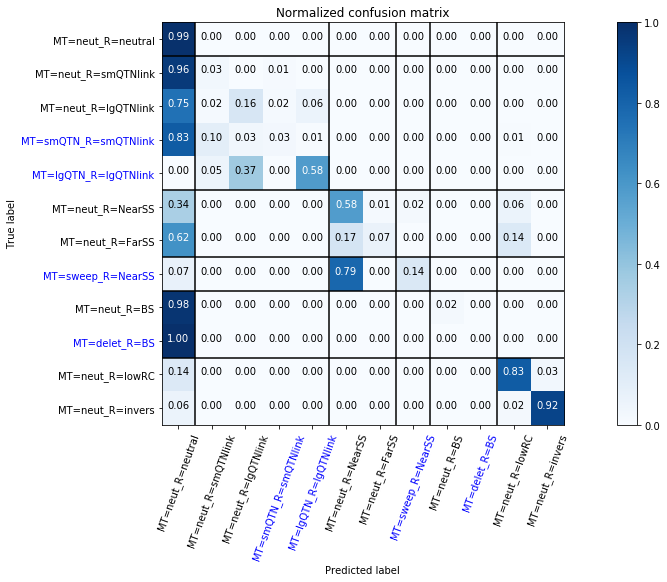

                      precision    recall  f1-score   support

       MT=delet_R=BS       0.00      0.00      0.00       102
MT=lgQTN_R=lgQTNlink       0.55      0.58      0.56        19
        MT=neut_R=BS       0.98      0.02      0.04      7847
     MT=neut_R=FarSS       0.52      0.07      0.12       167
    MT=neut_R=NearSS       0.60      0.58      0.59       253
    MT=neut_R=invers       0.95      0.92      0.93      3009
 MT=neut_R=lgQTNlink       0.50      0.16      0.24       131
     MT=neut_R=lowRC       0.83      0.83      0.83      2180
   MT=neut_R=neutral       0.89      0.99      0.94     78029
 MT=neut_R=smQTNlink       0.48      0.03      0.06       868
MT=smQTN_R=smQTNlink       0.22      0.03      0.05       158
   MT=sweep_R=NearSS       0.29      0.14      0.19        14

         avg / total       0.89      0.89      0.85     92777



In [4]:
plotReportForComparison("classifiers/noSampling10-30-18.p")

# Undersample data (1000) but add new H stats

This classifier uses 2 additional stats: H12 and H2/H1. They were calculated for each SNP using a 1000 bp window. Both stats are designed to detect selective sweeps.


Model with rank: 1

Mean test score: 0.559 (std: 0.018)

Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


Model with rank: 2

Mean test score: 0.557 (std: 0.018)

Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 20, 'min_samples_leaf': 1, 'min_samples_split': 3}

Model with rank: 3

Mean test score: 0.557 (std: 0.015)

Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 20, 'min_samples_leaf': 3, 'min_samples_split': 3}

Testing the best classifier, printing confusion matrix


Confusion matrix, without normalization
[[ 71  45   1   6   1   3   1   0 119   9   5   3]
 [ 46  72  11  36   0   0   1   0  66   5   1   2]
 [ 16  21  51  19   5   0   0   0  18   2   0   1]
 [ 21  25  21  68   1   0   3   0  16   5   0   1]
 [  0   0   4   5  10   0   0   0   0   0   0   0]
 [  0   0   0   0   0 219  27   3   0   0   4   0]
 [  1   0   0   0   0  53  71   0   4   3  13   0]
 [  0   0   0   0   0  12   0   2   0   0   0   0]
 [ 53  35   2   4   0   0   2   0 123  13   3   1]
 [ 29  16   2   2   0   1   0   0  45  12   1   1]
 [  0   1   0   0   0   6  12   0   1   1 204   8]
 [  2   0   0   0   0   0   0   0   1   0  14 233]]


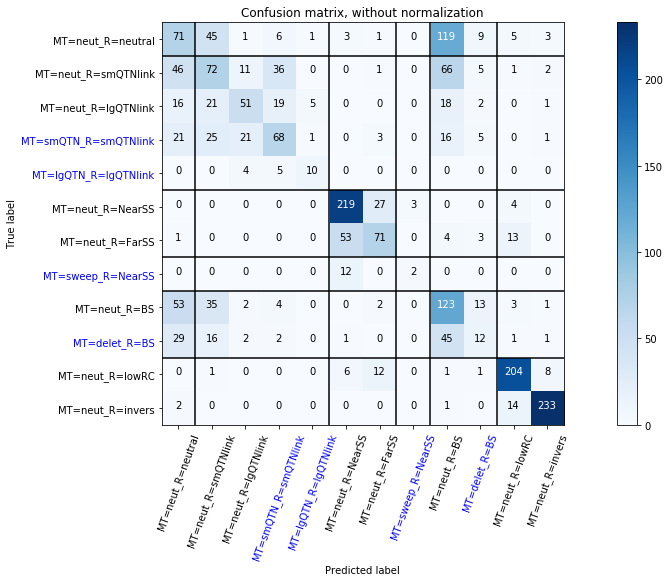

Normalized confusion matrix
[[0.27 0.17 0.   0.02 0.   0.01 0.   0.   0.45 0.03 0.02 0.01]
 [0.19 0.3  0.05 0.15 0.   0.   0.   0.   0.28 0.02 0.   0.01]
 [0.12 0.16 0.38 0.14 0.04 0.   0.   0.   0.14 0.02 0.   0.01]
 [0.13 0.16 0.13 0.42 0.01 0.   0.02 0.   0.1  0.03 0.   0.01]
 [0.   0.   0.21 0.26 0.53 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.87 0.11 0.01 0.   0.   0.02 0.  ]
 [0.01 0.   0.   0.   0.   0.37 0.49 0.   0.03 0.02 0.09 0.  ]
 [0.   0.   0.   0.   0.   0.86 0.   0.14 0.   0.   0.   0.  ]
 [0.22 0.15 0.01 0.02 0.   0.   0.01 0.   0.52 0.06 0.01 0.  ]
 [0.27 0.15 0.02 0.02 0.   0.01 0.   0.   0.41 0.11 0.01 0.01]
 [0.   0.   0.   0.   0.   0.03 0.05 0.   0.   0.   0.88 0.03]
 [0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.06 0.93]]


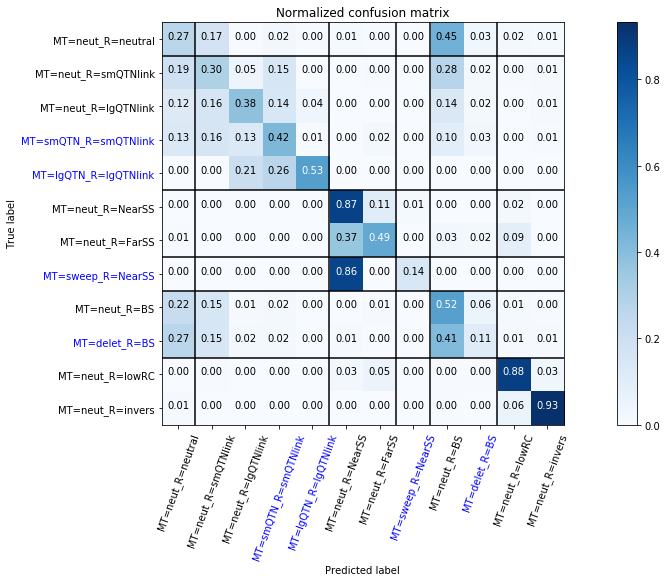

                      precision    recall  f1-score   support

       MT=delet_R=BS       0.24      0.11      0.15       109
MT=lgQTN_R=lgQTNlink       0.59      0.53      0.56        19
        MT=neut_R=BS       0.31      0.52      0.39       236
     MT=neut_R=FarSS       0.61      0.49      0.54       145
    MT=neut_R=NearSS       0.74      0.87      0.80       253
    MT=neut_R=invers       0.93      0.93      0.93       250
 MT=neut_R=lgQTNlink       0.55      0.38      0.45       133
     MT=neut_R=lowRC       0.83      0.88      0.85       233
   MT=neut_R=neutral       0.30      0.27      0.28       264
 MT=neut_R=smQTNlink       0.33      0.30      0.32       240
MT=smQTN_R=smQTNlink       0.49      0.42      0.45       161
   MT=sweep_R=NearSS       0.40      0.14      0.21        14

         avg / total       0.55      0.55      0.54      2057



In [4]:
plotReportForComparison("addH12.p")